In [ ]:
# ライブラリの読み込み
from sklearn.tree import DecisionTreeClassifier, plot_tree # 決定木モデルを構築する, 決定木分岐を描画するため
from sklearn.model_selection import train_test_split # 学習データと予測データに分けるため
from sklearn.metrics import confusion_matrix # 予測値と実測値がどれだけ合致しているかを測る混合行列を使うため

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# irisデータの読み込み
df = sns.load_dataset("iris")

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
# アヤメの種類を把握
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# 説明変数と目的変数に分ける
df_x = df.drop('species', axis=1) # species列以外が説明変数
df_y = df['species'] # species列以外が目的変数

In [ ]:
#学習データとテストデータに分割（テストデータは30%）
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.3)

In [ ]:
#モデル学習
model = DecisionTreeClassifier()
model.fit(train_x, train_y)

DecisionTreeClassifier()

In [ ]:
# 予測値を算出
pred_y = model.predict(test_x)
pred_y

array(['virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor'], dtype=object)

In [ ]:
# 正解率を表示
model.score(test_x, test_y)

0.9777777777777777

In [ ]:
# 混合行列を算出
confusion_matrix(pred_y, test_y)

array([[15,  0,  0],
       [ 0, 16,  0],
       [ 0,  1, 13]])

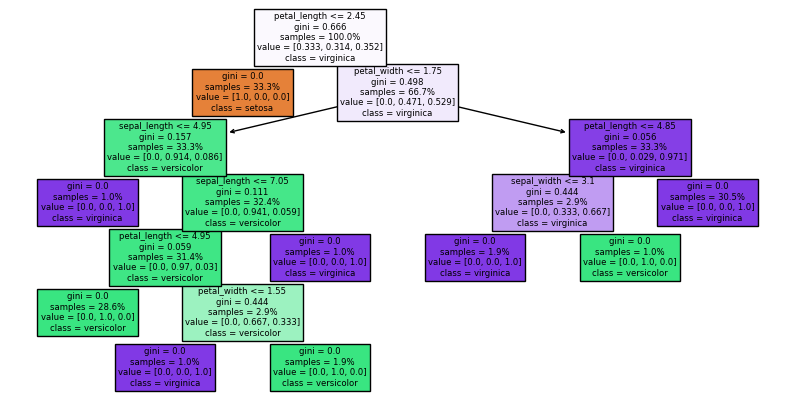

In [ ]:
## ツリーマップ
plt.figure(figsize=(10, 5))
plot_tree(model, feature_names=df_x.columns, filled=True, proportion=True, class_names=["setosa", "versicolor", "virginica"])
plt.show()

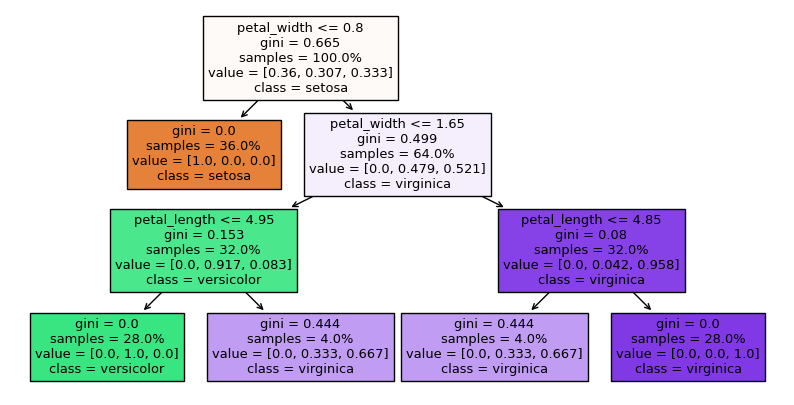

In [ ]:
# 説明変数と目的変数に分ける
df_x = df.drop('species', axis=1)
df_y = df['species']

#学習データをテストデータを分割
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.5)

#モデル学習
model = DecisionTreeClassifier(max_depth=3) # 葉の深さを制限することで、過学習問題を解消することがある
model.fit(train_x, train_y)

## ツリーマップ
plt.figure(figsize=(10,5))
plot_tree(model, feature_names=df_x.columns, filled=True, proportion=True, class_names=["setosa", "versicolor", "virginica"])
plt.show()